In [1]:
import numpy as np
import matplotlib.pyplot as plt
print('successfully loaded')

successfully loaded


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
print(sigmoid(1000))

1.0


In [4]:
print(sigmoid(0))

0.5


In [5]:
z=np.linspace(-10,10,200)
print(z)

[-10.          -9.89949749  -9.79899497  -9.69849246  -9.59798995
  -9.49748744  -9.39698492  -9.29648241  -9.1959799   -9.09547739
  -8.99497487  -8.89447236  -8.79396985  -8.69346734  -8.59296482
  -8.49246231  -8.3919598   -8.29145729  -8.19095477  -8.09045226
  -7.98994975  -7.88944724  -7.78894472  -7.68844221  -7.5879397
  -7.48743719  -7.38693467  -7.28643216  -7.18592965  -7.08542714
  -6.98492462  -6.88442211  -6.7839196   -6.68341709  -6.58291457
  -6.48241206  -6.38190955  -6.28140704  -6.18090452  -6.08040201
  -5.9798995   -5.87939698  -5.77889447  -5.67839196  -5.57788945
  -5.47738693  -5.37688442  -5.27638191  -5.1758794   -5.07537688
  -4.97487437  -4.87437186  -4.77386935  -4.67336683  -4.57286432
  -4.47236181  -4.3718593   -4.27135678  -4.17085427  -4.07035176
  -3.96984925  -3.86934673  -3.76884422  -3.66834171  -3.5678392
  -3.46733668  -3.36683417  -3.26633166  -3.16582915  -3.06532663
  -2.96482412  -2.86432161  -2.7638191   -2.66331658  -2.56281407
  -2.4623115

In [6]:
#apply sigmoid funtion to number
sig =sigmoid(z)

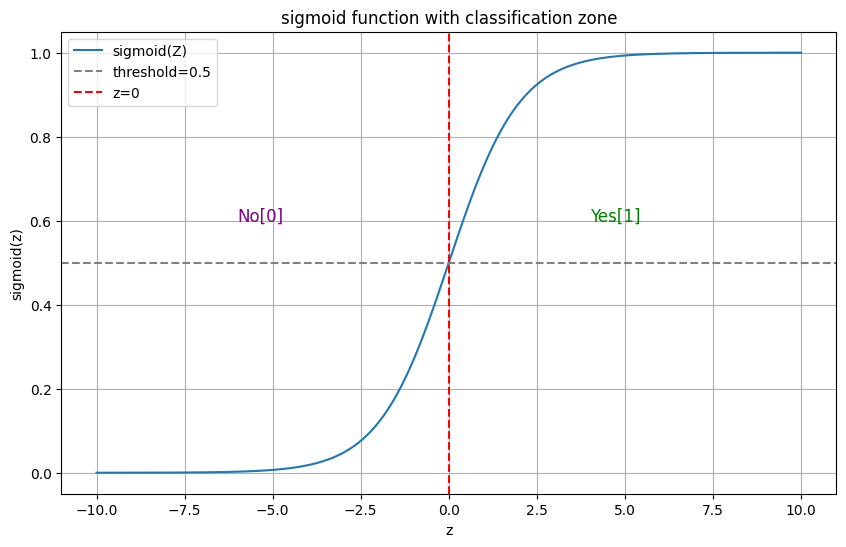

In [7]:
#plot
plt.figure(figsize=(10,6))
plt.plot(z,sig,label='sigmoid(Z)')
plt.title('sigmoid function with classification zone')
plt.axhline(0.5,color='grey',linestyle='--',label='threshold=0.5')
plt.axvline(0,color='red',linestyle='--',label='z=0')
plt.text(-6,0.6,'No[0]',fontsize=12,color='purple')
plt.text(4,0.6,'Yes[1]',fontsize=12,color='green')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.legend()
plt.show()
           
         
         


#  TITANIC DATASET

In [8]:
import pandas as pd
import seaborn as sns
print('imported successfully')

imported successfully


In [33]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df=df.drop(['deck','embark_town','alive','who','adult_male','class'],axis=1)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [12]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64

In [29]:
# HANDLING  MISSING VALUE
df['age']= df['age'].fillna(df['age'].median())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [30]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['embarked']=df['embarked'].map({'s':0,'c':1,'Q':2})


In [31]:
print(df.head(10))

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3  NaN  22.0      1      0   7.2500       NaN  False
1         1       1  NaN  38.0      1      0  71.2833       NaN  False
2         1       3  NaN  26.0      0      0   7.9250       NaN   True
3         1       1  NaN  35.0      1      0  53.1000       NaN  False
4         0       3  NaN  35.0      0      0   8.0500       NaN   True
5         0       3  NaN  28.0      0      0   8.4583       NaN   True
6         0       1  NaN  54.0      0      0  51.8625       NaN   True
7         0       3  NaN   2.0      3      1  21.0750       NaN  False
8         1       3  NaN  27.0      0      2  11.1333       NaN  False
9         1       2  NaN  14.0      1      0  30.0708       NaN  False


In [16]:
df[['age','embarked']]

,age,embarked
0,22.0,NaN
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,35.0,NaN
...,...,...
886,27.0,NaN
887,19.0,NaN
888,28.0,NaN
889,26.0,NaN


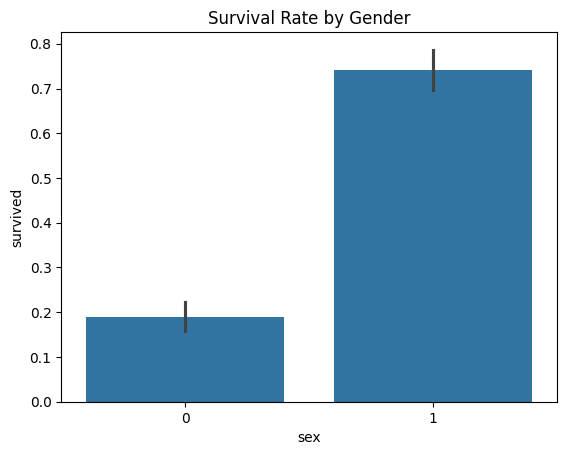

In [17]:
sns.barplot(x='sex',y='survived',data=df)
plt.title('Survival Rate by Gender')
plt.show()


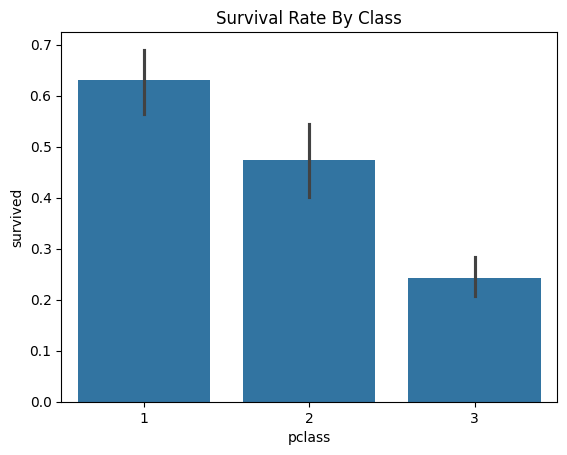

In [18]:
sns.barplot(x='pclass',y='survived',data=df)
plt.title('Survival Rate By Class')
plt.show()

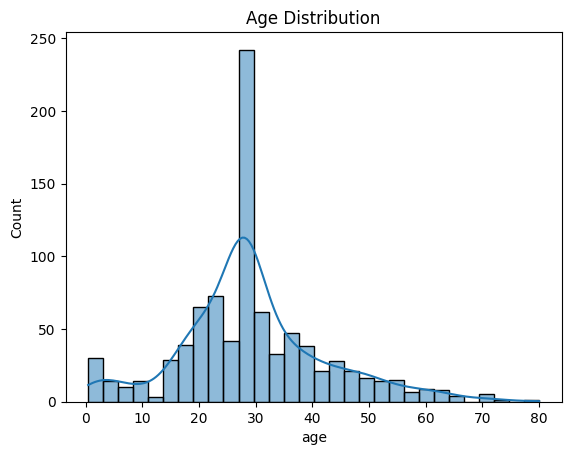

In [19]:
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

# BUILDING THE MODEL

In [20]:
x=df[['pclass','sex','age','fare','sibsp','parch','embarked']]
y=df['survived']

# splitting data into traning and testing

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train

,pclass,sex,age,fare,sibsp,parch,embarked
331,1,0,45.5,28.5000,0,0,NaN
733,2,0,23.0,13.0000,0,0,NaN
382,3,0,32.0,7.9250,0,0,NaN
704,3,0,26.0,7.8542,1,0,NaN
813,3,1,6.0,31.2750,4,2,NaN
...,...,...,...,...,...,...,...
106,3,1,21.0,7.6500,0,0,NaN
270,1,0,28.0,31.0000,0,0,NaN
860,3,0,41.0,14.1083,2,0,NaN
435,1,1,14.0,120.0000,1,2,NaN


In [23]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

In [24]:
x_test

,pclass,sex,age,fare,sibsp,parch,embarked
709,3,0,28.0,15.2458,1,1,NaN
439,2,0,31.0,10.5000,0,0,NaN
840,3,0,20.0,7.9250,0,0,NaN
720,2,1,6.0,33.0000,0,1,NaN
39,3,1,14.0,11.2417,1,0,NaN
...,...,...,...,...,...,...,...
433,3,0,17.0,7.1250,0,0,NaN
773,3,0,28.0,7.2250,0,0,NaN
25,3,1,38.0,31.3875,1,5,NaN
84,2,1,17.0,10.5000,0,0,NaN


In [25]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

# BUILD THE MODEL

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model= LogisticRegression(max_iter=1000,solver='liblinear')
model.fit(x_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values